In [2]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [3]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [54]:
import os
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from SSMuLA.fitness_process_vis import parse_lib_stat
from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, LIB_COLORS
from SSMuLA.zs_analysis import (
    ZS_OPTS,
    ZS_COMB_OPTS,
    ZS_OPTS_LEGEND,
)

%matplotlib inline

In [5]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
TOTAL_N_LIST = [n + 96 for n in N_SAMPLE_LIST]

In [6]:
lib_stat = parse_lib_stat(
    lib_csv_path="results/fitness_distribution/max/all_lib_stats.csv", n_mut_cuttoff=0
)
lib_stat

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,scale,peaks,peak_kde,percentiles,pdf_values,parent_rank_percent,Q1,Q2,Q3,numb_kde_peak
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,1.737006e-03,"[0.1275662158236592, 0.5084256342965795, 0.606...","[18.95715826406059, 0.17704519880582167, 0.098...","[0.1151661417338432, 0.1212571134074551, 0.122...","[15.199742695395578, 15.667091596432273, 16.11...",0.075250,0.125979,0.127567,0.129802,7
3,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,1.099060e-01,"[0.03337870027347259, 0.6106664209434821, 0.85...","[2.870133679609529, 0.40012326949250876, 0.421...","[-0.2192609576095971, -0.11180451121954202, -0...","[0.026974121384613872, 0.028121215058096317, 0...",0.001522,0.023743,0.112118,0.374642,3
6,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,1.567318e-01,"[0.12255350949782506, 0.2818697911295817, 0.89...","[1.5849621685610578, 1.5168268815479706, 0.556...","[-0.2057345859857947, -0.0879267691331092, -0....","[0.01869666257662742, 0.01949003646085834, 0.0...",0.000888,0.112217,0.276349,0.470212,3
9,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,2.786774e-04,"[0.001001001001001001, 0.15015015015015015, 0....","[84.94812751924495, 0.14711297529110418, 0.091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[84.45520645025827, 84.94812751924495, 80.8935...",0.024397,0.000156,0.000386,0.001026,33
12,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,3.213795e-20,"[0.12212212212212212, 0.22022022022022023, 0.2...","[0.1355385385042058, 0.10759849737430795, 0.09...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.89058161801743, 25.83678275907177, 25.6612...",0.024238,0.000000,0.000000,0.000000,11
15,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,1.890048e-02,"[-0.7917824701915064, -0.7605090595208127, -0....","[0.0036245994071766735, 0.0021495792852726805,...","[-0.8377727800013499, -0.26246975122161975, -0...","[0.13783458085674552, 0.1361875808265587, 0.12...",0.004179,-0.030314,-0.011234,0.008629,27
18,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,2.442504e-02,"[-0.3944951616078841, -0.3170232081852239, -0....","[0.005954476272084834, 0.020369915569709816, 0...","[-0.5794792136579096, -0.159409524561979, -0.1...","[0.005958068940422161, 0.005853464928384218, 0...",0.000125,-0.066102,-0.039751,-0.013193,9
21,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,1.793460e-02,"[-0.3315353103440577, -0.25764490240877025, -0...","[0.00787295674657887, 0.017643469342674266, 0....","[-0.5064595413745341, -0.14947773198508532, -0...","[0.00789062638682396, 0.007669391706426372, 0....",0.000125,-0.074532,-0.055559,-0.036157,8
24,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,4.350006e-02,"[-0.7129431024521451, -0.676881142400521, -0.4...","[0.0036129353359320897, 0.003617641013231226, ...","[-0.8012949045786242, -0.3009295839772114, -0....","[0.0035276345242041393, 0.003499097774177849, ...",0.000125,-0.120727,-0.073272,-0.026945,8
27,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,2.078814e-02,"[-0.4327437550162602, -0.3044598574343214, 0.0...","[0.007988036362784934, 0.024487960087067218, 1...","[-0.4399507155545714, -0.11762175754299561, -0...","[0.007441392159327368, 0.007659122367135711, 0...",0.001288,-0.014157,0.005591,0.030403,13


In [7]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot_2.csv")
de_all = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")

In [8]:
# mlde_new1 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_3/vis/all_df.csv")
# mlde_new1

In [9]:
# mlde_new2 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_hm2zs_3/vis/all_df.csv")
# mlde_new2

In [10]:
# mlde_new3 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_coves/vis/all_df.csv")
# mlde_new3

In [11]:
# mlde_all = pd.concat([mlde_all, mlde_new1, mlde_new2, mlde_new3], axis=0)
# mlde_all.to_csv("results/mlde/all_df_comb_onehot_2.csv", index=False)
# mlde_all

In [12]:
active_cutoff = 1
active_lib_list = lib_stat[(lib_stat["percent_active"]>=active_cutoff)]["lib"].tolist() # & (lib_stat["percent_measured"]>90)
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'T7',
 'TEV',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [13]:
def get_mlde_avg_df(mlde_all, n_top, n_mut_cutoff, zs, active_lib_list):
    avg_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"] == zs)
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
        & (mlde_all["rep"].isin(np.arange(50)))
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})
    return avg_mlde

In [14]:
FTLIB_FRAC_LIST = [0.125, 0.25, 0.5, 1]

In [15]:
# ft only 12.5
def get_mlde_avg_sdf(mlde_all, n_top, n_mut_cutoff, zs, active_lib_list, ft_frac = 0.125):
    slice_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"].isin([zs]))
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
        & (mlde_all["rep"].isin(np.arange(50)))
    ]
    
    if zs != "none":
        lib_dfs = []
        for lib in active_lib_list:
            lib_df = slice_mlde[slice_mlde["lib"] == lib].copy()
            
            print(lib)

            lib_df["ft_lib_size"] = lib_df["ft_lib"].map(
                {
                    numb: frac
                    for numb, frac in zip(
                        sorted(lib_df["ft_lib"].unique()), FTLIB_FRAC_LIST
                    )
                }
            )

            print({numb: frac
                    for numb, frac in zip(
                        sorted(lib_df["ft_lib"].unique()), FTLIB_FRAC_LIST
                    )
                })
            lib_dfs.append(lib_df[lib_df["ft_lib_size"] == ft_frac])
        slice_mlde = pd.concat(lib_dfs)

    avg_mlde = slice_mlde[["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'}).set_index("n_sample")
    return avg_mlde

In [16]:
ZS_OPTS

['ed_score',
 'ev_score',
 'esm_score',
 'esmif_score',
 'coves_score',
 'Triad_score']

In [17]:
n_top = 96
avg_mlde_df_dict = {}

# just mlde
avg_mlde_df_dict["MLDE"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="all", zs="none", active_lib_list=active_lib_list, ft_frac=0.125
)
avg_mlde_df_dict["ftMLDE: Hamming distance"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="double", zs="none", active_lib_list=active_lib_list, ft_frac=0.125
)

for zs in ZS_OPTS[1:]:
    avg_mlde_df_dict[f"ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_sdf(
        mlde_all, n_top, n_mut_cutoff="all", zs=zs, active_lib_list=active_lib_list, ft_frac=0.125
    )

DHFR
{1000: 0.125, 2000: 0.25, 4000: 0.5}
ParD2
{1000: 0.125, 2000: 0.25, 4000: 0.5}
ParD3
{1000: 0.125, 2000: 0.25, 4000: 0.5}
GB1
{20000: 0.125, 40000: 0.25, 80000: 0.5}
T7
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TEV
{20000: 0.125, 40000: 0.25, 80000: 0.5}
TrpB3D
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3E
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3F
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3G
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3I
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB4
{20000: 0.125, 40000: 0.25, 80000: 0.5}
DHFR
{1000: 0.125, 2000: 0.25, 4000: 0.5}
ParD2
{1000: 0.125, 2000: 0.25, 4000: 0.5}
ParD3
{1000: 0.125, 2000: 0.25, 4000: 0.5}
GB1
{20000: 0.125, 40000: 0.25, 80000: 0.5}
T7
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TEV
{20000: 0.125, 40000: 0.25, 80000: 0.5}
TrpB3D
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3E
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3F
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3G
{1000: 0.125, 2000: 0.25, 4000: 0.5}
TrpB3I
{1000: 0.125, 2000: 0.25, 4000: 0.5}
Tr

In [18]:
de_avg = (
    de_all[de_all["lib"].isin(active_lib_list)][["de_type", "mean_all", "fraction_max"]]
    .groupby("de_type")
    .agg(["mean", "std"])
)
de_avg.columns = ["{}_{}".format(i, j) for i, j in de_avg.columns]
de_avg = de_avg.rename(columns={"de_type_": "de_type"})
de_avg

,mean_all_mean,mean_all_std,fraction_max_mean,fraction_max_std
de_type,,,,
recomb_SSM,0.614846,0.237674,0.107207,0.134063
single_step_DE,0.672176,0.224364,0.224935,0.190742
top96_SSM,0.748514,0.229485,0.351371,0.286490


In [19]:
avg_mlde_df_dict["Average ftMLDE"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[1:]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [20]:
def aggregate_alde_df(
    eq_n: int,
    lib_list: list,
    zs: str = "",
    alde_model: str = "Boosting Ensemble",
    alde_encoding: str = "onehot",
    alde_acq: str = "GREEDY",
    alde_dir: str = "/disk2/fli/alde4ssmula",
) -> pd.DataFrame:

    """
    Aggregate ALDE results for a given list of libraries and equal n.

    Args:
    - eq_n (int): Equal n for the libraries.
    - lib_list (list): List of libraries to aggregate.

    Returns:
    - df (pd.DataFrame): Aggregated ALDE results.
    """

    df = pd.DataFrame(
        columns=[
            "n_sample",
            "top_maxes_mean",
            "top_maxes_std",
            "if_truemaxs_mean",
            "if_truemaxs_std",
        ]
    )

    for n in N_SAMPLE_LIST:

        if zs != "":
            zs_append = f"{zs}_"
            res_append = ""
        else:
            zs_append = ""
            res_append = "_2"

        if eq_n == 1:
            csv_path = f"{alde_dir}/results/{zs_append}all_{str(n)}+96/all_results{res_append}.csv"
            
        else:
            csv_path = f"{alde_dir}/results/{zs_append}{str(eq_n)}eq_{str(int((n+96)/eq_n))}/all_results{res_append}.csv"

        if os.path.exists(csv_path):
            a_df = pd.read_csv(csv_path)

            # Get the max Timestep for each Protein
            max_timesteps = a_df.groupby("Protein")["Timestep"].transform("max")
            # DNN Ensemble
            # Boosting Ensemble
            slice_df = a_df[
                (a_df["Encoding"] == alde_encoding)
                & (a_df["Acquisition"] == alde_acq)
                & (a_df["Model"] == alde_model)
                & (a_df["Protein"].isin(lib_list))
                & (a_df["Timestep"] == max_timesteps)
            ]
            # for each Protein take the max of the timestep

            # print(slice_df)
            df = df._append(
                {
                    "n_sample": n,
                    "top_maxes_mean": slice_df["Mean"].mean(),
                    "top_maxes_std": slice_df["Mean"].std(),
                    "if_truemaxs_mean": slice_df["Frac"].mean(),
                    "if_truemaxs_std": slice_df["Frac"].std(),
                },
                ignore_index=True,
            )
        
        else:
            print(f"File not found: {csv_path}")
            
            df = df._append(
                {
                    "n_sample": n,
                    "top_maxes_mean": np.nan,
                    "top_maxes_std": np.nan,
                    "if_truemaxs_mean": np.nan,
                    "if_truemaxs_std": np.nan,
                },
                ignore_index=True,
            )

    return df.set_index("n_sample")

In [21]:
ZS_OPTS_LEGEND

{'none': 'Random',
 'ed_score': 'Hamming distance',
 'Triad_score': 'Triad',
 'ev_score': 'EVmutation',
 'esm_score': 'ESM',
 'esmif_score': 'ESM-IF',
 'coves_score': 'CoVES',
 'struc-comb_score': 'Triad + ESM-IF',
 'Triad-ev_score': 'Triad + EVmutation',
 'Triad-esm_score': 'Triad + ESM',
 'msanoif-comb_score': 'EVmutation + ESM',
 'two-best_score': 'EVmutation + ESM-IF',
 'msa-comb_score': 'EVmutation + ESM + ESM-IF',
 'structnmsa-comb_score': 'Triad + EVmutation + ESM + ESM-IF'}

In [22]:
for eq_n in [1, 2, 3, 4]:

    avg_mlde_df_dict[f"ALDE x {eq_n}"] = aggregate_alde_df(
        eq_n, active_lib_list, alde_model="Boosting Ensemble"
    )

In [23]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 4"] = aggregate_alde_df(
        eq_n=4, lib_list = active_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [24]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 3"] = aggregate_alde_df(
        eq_n=3, lib_list = active_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [25]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 2"] = aggregate_alde_df(
        eq_n=2, lib_list = active_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [29]:
avg_mlde_df_dict["Average ftALDE x 4"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12:12+6]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [30]:
avg_mlde_df_dict["Average ftALDE x 3"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12+6+1:12+6+1+6]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [31]:
avg_mlde_df_dict["Average ftALDE x 2"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12+6*2+1*2:]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [34]:
import seaborn as sns

In [35]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

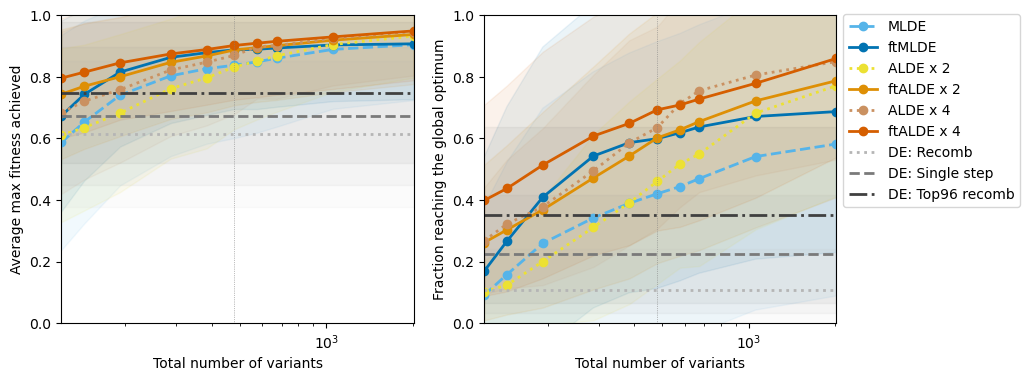

In [36]:
# for avg cross number of samples
n_top = 96
n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = [
    sns.color_palette("colorblind")[9],
    sns.color_palette("colorblind")[0],
    sns.color_palette("colorblind")[8],
    sns.color_palette("colorblind")[1],
    sns.color_palette("colorblind")[5],
    sns.color_palette("colorblind")[3],
    # *sns.color_palette("colorblind")[:]

]
line_styles = ["dashed", "solid", "dotted", "solid", "dotted", "solid"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (mlde_opts) in enumerate(
        [
            "MLDE",
            "Average ftMLDE",
            # "ALDE x 1",
            "ALDE x 2",
            "Average ftALDE x 2",
            # "ALDE x 3",
            # "Average ftALDE x 3",
            "ALDE x 4",
            "Average ftALDE x 4",
        ]
    ):
        mlde_df = avg_mlde_df_dict[mlde_opts]

        ax.plot(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            # label=label_app+mlde_opts,
            label=mlde_opts.replace("Average ", ""),
            marker="o",
            linestyle=line_styles[i],
            linewidth=2,
            # color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            color=mlde_color_list[i]
        )
        ax.fill_between(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            # color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            color=mlde_color_list[i],
            alpha=0.08,
        )

    de_colors = sns.color_palette("Greys", 4)
    de_ls = ["dotted", "dashed", "dashdot"]

    for d, de in enumerate(DE_TYPES):
        ax.axhline(
            de_avg.loc[de, f"{de_metric}_mean"],
            label=f"DE: {DE_LEGEND_MAP[de]}",
            color=de_colors[d+1],
            linestyle=de_ls[d],
            linewidth=2,
        )
        ax.fill_between(
            TOTAL_N_LIST,  # N_SAMPLE_LIST,
            de_avg.loc[de, f"{de_metric}_mean"] - de_avg.loc[de, f"{de_metric}_std"],
            de_avg.loc[de, f"{de_metric}_mean"] + de_avg.loc[de, f"{de_metric}_std"],
            color=de_colors[d+1],
            alpha=0.05,
        )

    # add vline
    ax.axvline(n_corr+n_top, color="gray", linewidth=0.5, linestyle="dotted")

    # ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    # ax.set_xlabel("Number of training samples")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))

# fig.suptitle(
#     "(ft)MLDE vs DE Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
# )

In [37]:
list(avg_mlde_df_dict.keys())

['MLDE',
 'ftMLDE: Hamming distance',
 'ftMLDE: EVmutation',
 'ftMLDE: ESM',
 'ftMLDE: ESM-IF',
 'ftMLDE: CoVES',
 'ftMLDE: Triad',
 'Average ftMLDE',
 'ALDE x 1',
 'ALDE x 2',
 'ALDE x 3',
 'ALDE x 4',
 'ESM-IF ALDE x 4',
 'EVmutation ALDE x 4',
 'CoVES ALDE x 4',
 'Hamming distance ALDE x 4',
 'ESM ALDE x 4',
 'Triad ALDE x 4',
 'ESM-IF ALDE x 3',
 'EVmutation ALDE x 3',
 'CoVES ALDE x 3',
 'Hamming distance ALDE x 3',
 'ESM ALDE x 3',
 'Triad ALDE x 3',
 'ESM-IF ALDE x 2',
 'EVmutation ALDE x 2',
 'CoVES ALDE x 2',
 'Hamming distance ALDE x 2',
 'ESM ALDE x 2',
 'Triad ALDE x 2',
 'Average ftALDE x 4',
 'Average ftALDE x 3',
 'Average ftALDE x 2']

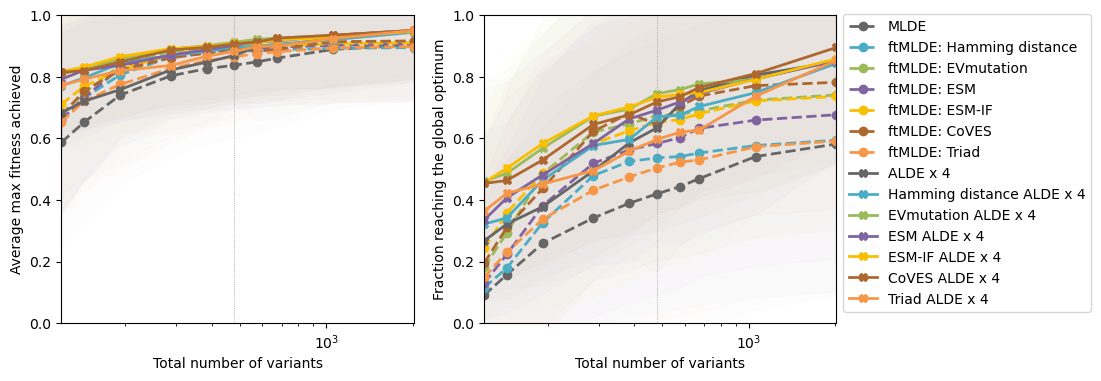

In [40]:
# now split into different zs
# for avg cross number of samples
n_top = 96
n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = [
    "gray",
    "blue",
    "green",
    "purple",
    "yellow",
    "brown",
    "orange",
]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (mlde_opts) in enumerate(
        [
            "MLDE",
            'ftMLDE: Hamming distance',
            'ftMLDE: EVmutation',
            'ftMLDE: ESM',
            'ftMLDE: ESM-IF',
            'ftMLDE: CoVES',
            'ftMLDE: Triad',
            'ALDE x 4',
            'Hamming distance ALDE x 4',
            'EVmutation ALDE x 4',
            'ESM ALDE x 4',
            'ESM-IF ALDE x 4',
            'CoVES ALDE x 4',
            'Triad ALDE x 4',
        ]
    ):
        mlde_df = avg_mlde_df_dict[mlde_opts]

        ax.plot(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            # label=label_app+mlde_opts,
            label=mlde_opts.replace("Average ", ""),
            marker=marker_styles[i],
            linestyle=line_styles[i],
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            # color=mlde_color_list[i]
        )
        ax.fill_between(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            # color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            color=mlde_color_list[i],
            alpha=0.01,
        )

    # add vline
    ax.axvline(n_corr+n_top, color="gray", linewidth=0.5, linestyle="dotted")

    # ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    # ax.set_xlabel("Number of training samples")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))

# fig.suptitle(
#     "(ft)MLDE vs DE Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
# )

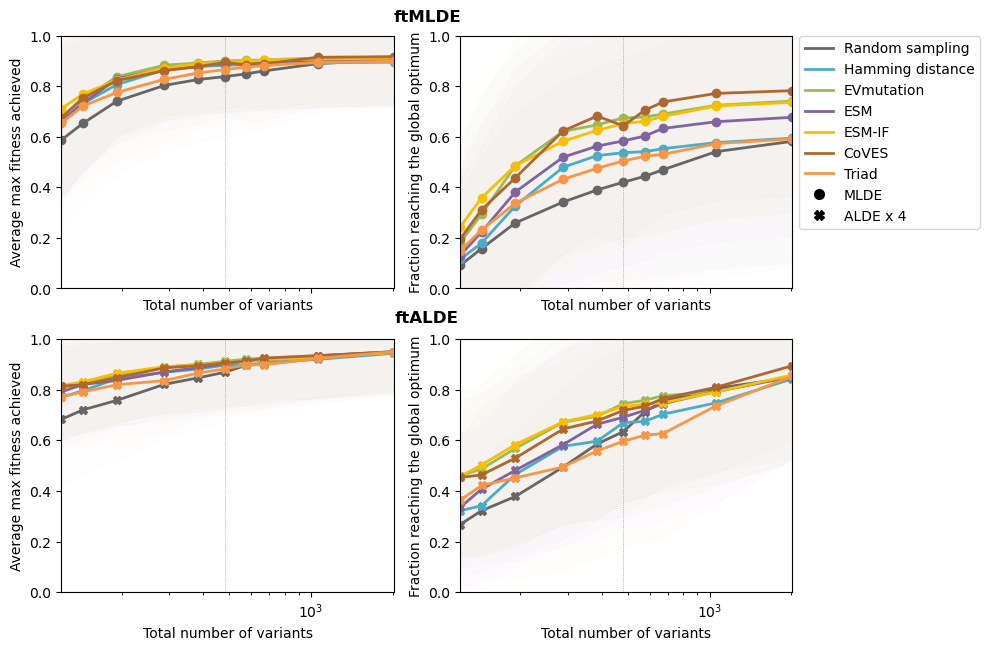

In [74]:
# Define constants
n_top = 96
n_corr = 384

fig, axes = plt.subplots(
    2, 2, figsize=(10, 6.4), sharex=True
)  # Create a 2x2 grid of subplots
mlde_color_list = ["gray", "blue", "green", "purple", "yellow", "brown", "orange"]

# Define the data and labels for MLDE and ALDE cases
options_dict = {
    "MLDE": [
        "MLDE",
        "ftMLDE: Hamming distance",
        "ftMLDE: EVmutation",
        "ftMLDE: ESM",
        "ftMLDE: ESM-IF",
        "ftMLDE: CoVES",
        "ftMLDE: Triad",
    ],
    "ALDE": [
        "ALDE x 4",
        "Hamming distance ALDE x 4",
        "EVmutation ALDE x 4",
        "ESM ALDE x 4",
        "ESM-IF ALDE x 4",
        "CoVES ALDE x 4",
        "Triad ALDE x 4",
    ],
}

marker_styles = ["o", "X"]

y_labels = ["Average max fitness achieved", "Fraction reaching the global optimum"]


# Loop over both MLDE and ALDE data in the first and second rows respectively
for row, (method, options) in enumerate(options_dict.items()):
    for ax, mlde_metric, y_label in zip(
        axes[row, :], ["top_maxes", "if_truemaxs"], y_labels
    ):

        for i, mlde_opts in enumerate(options):
            mlde_df = avg_mlde_df_dict[mlde_opts]

            ax.plot(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"],
                label=mlde_opts.replace("Average ", ""),
                marker=marker_styles[row],
                linewidth=2,
                color=PRESENTATION_PALETTE_SATURATE[
                    mlde_color_list[i % len(mlde_color_list)]
                ],
            )

            ax.fill_between(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
                mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
                color=mlde_color_list[i % len(mlde_color_list)],
                alpha=0.01,
            )

        ax.axvline(n_corr + n_top, color="gray", linewidth=0.5, linestyle="dotted")
        ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
        ax.set_ylim(0, 1.0)
        ax.set_xscale("log")
        ax.set_xlabel("Total number of variants")
        ax.set_ylabel(y_label)

# add first legend to be different zs
mlde_color_dict = {
    l.replace("ftMLDE: ", "").replace(
        "MLDE", "Random sampling"
    ): PRESENTATION_PALETTE_SATURATE[c]
    for (l, c) in zip(options_dict["MLDE"], mlde_color_list)
}
# Create legend for line colors using the color dictionary
color_handles = [
    Line2D([0], [0], color=color, lw=2, label=label)
    for label, color in mlde_color_dict.items()
]

marker_style_dict = {"MLDE": "o", "ALDE x 4": "X"}
# Create legend for marker styles using the marker dictionary
marker_handles = [
    Line2D(
        [0],
        [0],
        marker=marker,
        color="black",
        linestyle="None",
        markersize=7,
        label=label,
    )
    for label, marker in marker_style_dict.items()
]

# Add the legends to the figure
axes[0, 1].legend(
    handles=color_handles + marker_handles, loc="upper left", bbox_to_anchor=(1, 1.025)
)
# axes[0, 1].legend(handles=marker_handles, loc="upper left", bbox_to_anchor=(1, 0.25))

# fig.suptitle("ftMLDE Performance", fontsize=12, y=0.98)
fig.text(0.432, 0.99, "ftMLDE", ha="center", fontsize=12, fontweight="bold")

# Adding a second super title between the two rows (adjust 'y' for precise positioning)
fig.text(0.432, 0.52, "ftALDE", ha="center", fontsize=12, fontweight="bold")


# Adjust the layout to prevent overlapping
plt.tight_layout(h_pad=1.5)
plt.show()